In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

from pylab import rcParams

rcParams['figure.figsize'] = 20, 6
rcParams['axes.grid'] = True

In [3]:
def evaluate_predictions(y_true, y_pred):
    return pd.DataFrame({
        'y mean': pd.np.mean(y_true),
        'mae': mean_absolute_error(y_true, y_pred),
        'mse': mean_squared_error(y_true, y_pred),
        'rmse': pd.np.sqrt(mean_squared_error(y_true, y_pred))
    }).T

## Holt-Winters Method

### Simple Exponential Smoothing / Simple Moving Average
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### Double Exponential Smoothing / Holt's Method
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### Triple Exponential Smoothing / Holt-Winters Method
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

In [4]:
df = pd.read_csv('../meta/airline_passengers.csv',index_col='Month',parse_dates=True)
df.dropna(inplace=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
df_train = df.loc[:'1957']
df_test = df.loc['1958':]

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df_train['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [8]:
df_pred = model.forecast(36).rename('HW Forecast')

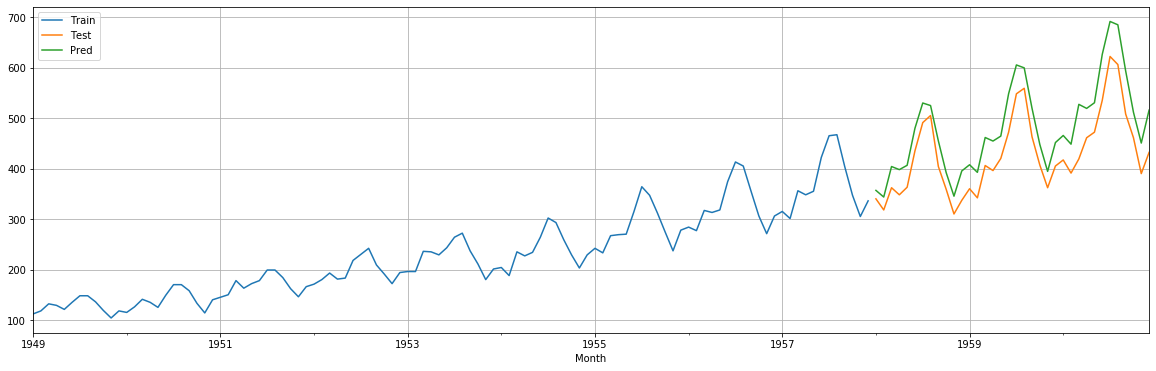

In [9]:
df_train['Thousands of Passengers'].plot(label='Train', legend=True)
df_test['Thousands of Passengers'].plot(label='Test', legend=True)
df_pred.plot(label='Pred', legend=True);

In [10]:
evaluate_predictions(df_test, df_pred)

,Thousands of Passengers
y mean,428.500000
mae,53.163266
mse,3200.539650
rmse,56.573312


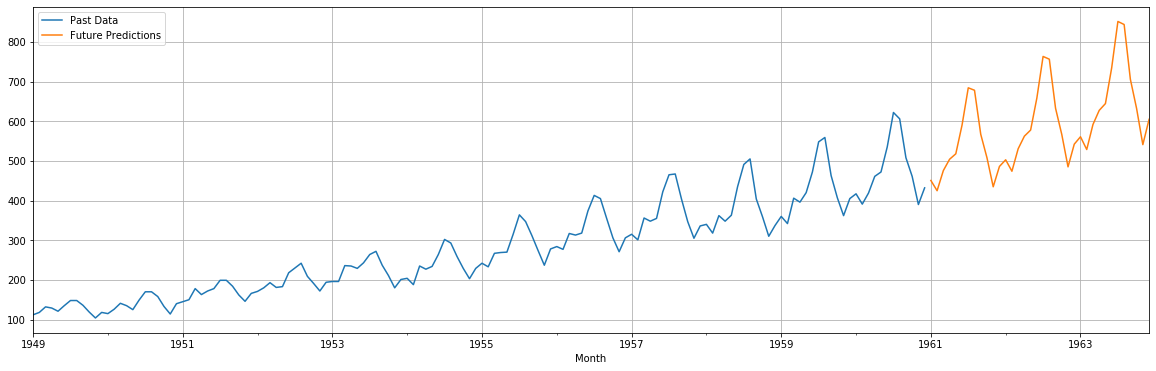

In [11]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
forecast_predictions = final_model.forecast(36)
df['Thousands of Passengers'].plot(label='Past Data', legend=True)
forecast_predictions.plot(label='Future Predictions', legend=True);